### Prediction of the type of wine based on the results of a chemical analysis of wines grown in the same region in Italy. 
### The goal is to find proper value of k with and without features scaling

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

column_names = ['Class','Alcohol','Malic acid',
                'Ash','Alcalinity of ash','Magnesium',
                'Total phenols','Flavanoids','Nonflavanoid phenols',
                'Proanthocyanins','Color intensity',
                'Hue','OD280/OD315 of diluted wines','Proline']

data_set = pd.read_csv('wine.csv', names=column_names)

### Find the best k in KNN method without scaling.
Quality estimated via cross-validation.


The best perfomance with k = 1 equal to 0.730476


Text(0, 0.5, 'accuracy')

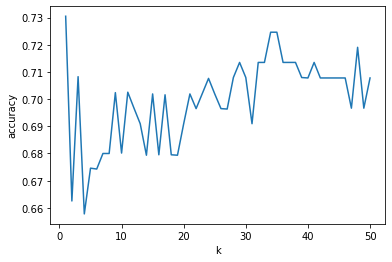

In [2]:
# Prepare data for cross-validation process
data_array = data_set.to_numpy()
# We can use both np.array and DataFrame representation
# -----
# y = data_array[:, 0]
# X = data_array[:, 1:]
# -----
X = data_set.loc[:, data_set.columns != 'Class']
y = data_set['Class']
num_neigh = np.arange(1, 51, 1)
# Array of scores
score_arr = np.zeros((len(num_neigh)))
# K-Folds cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for ii in range(len(num_neigh)):
    # Classifier implementing the k-nearest neighbors vote
    k_neigh = KNeighborsClassifier(n_neighbors=num_neigh[ii])
    # Evaluation of mean value of CV score
    score_arr[ii] = np.mean(cross_val_score(estimator=k_neigh, X=X, y=y, cv=kf, scoring='accuracy'))

best_k = num_neigh[np.argmax(score_arr)]
best_quality = score_arr[np.argmax(score_arr)]

print('The best perfomance with k = %g equal to %g' % (best_k, best_quality))
# Plor the accuracy(k) dependance
fig1, ax1 = plt.subplots()
ax1.plot(num_neigh, score_arr)
ax1.set_xlabel('k')
ax1.set_ylabel('accuracy')

### Same task but now perform a scale of the features (масштабирование признаков)

The best perfomance with k = 29 equal to 0.977619


Text(0, 0.5, 'accuracy')

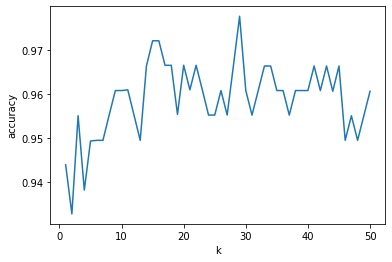

In [3]:
X_scale = scale(X)
num_neigh = np.arange(1, 51, 1)
# Array of scores
score_arr = np.zeros((len(num_neigh)))
# K-Folds cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for ii in range(len(num_neigh)):
    # Classifier implementing the k-nearest neighbors vote
    k_neigh = KNeighborsClassifier(n_neighbors=num_neigh[ii])
    # Evaluation of mean value of CV score
    score_arr[ii] = np.mean(cross_val_score(estimator=k_neigh, X=X_scale, y=y, cv=kf, scoring='accuracy'))

best_k = num_neigh[np.argmax(score_arr)]
best_quality = score_arr[np.argmax(score_arr)]

print('The best perfomance with k = %g equal to %g' % (best_k, best_quality))
# Plor the accuracy(k) dependance
fig2, ax2 = plt.subplots()
ax2.plot(num_neigh, score_arr)
ax2.set_xlabel('k')
ax2.set_ylabel('accuracy')